In [ ]:
# Essentials
import numpy as np
import numpy.linalg as lg
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import string
import os
import re #########

# Tensor
import tensorflow as tf
import tensorflow_hub as hub

# NLTK
import nltk
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer 
from nltk import pos_tag
nltk.download("stopwords")
nltk.download('punkt')
nltk.download("averaged_perceptron_tagger")



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [ ]:
module_url = 'https://tfhub.dev/google/universal-sentence-encoder/4'

In [ ]:
embedder = hub.load(module_url)



In [ ]:
def TextPreprocesor(sentence):

  text = sentence.lower()
  text_p = "".join([char for char in text if char not in string.punctuation])
  clean_sentence = re.sub(r'http\S+', '', text_p)
  return clean_sentence
        

In [ ]:
def embed(sentence):
  sentence_in = [sentence]
  return embedder(sentence_in)

In [ ]:
def data_Load(file):
  data = pd.read_csv(file, header = 0,encoding= 'iso-8859-1')
  X = data.Tweet
  return X


In [ ]:
X = data_Load('/content/data_elonmusk.csv')

In [ ]:
X.head()

,row ID,Tweet,Time,Retweet from,User
0,Row0,@MeltingIce Assuming max acceleration of 2 to ...,2017-09-29 17:39:19,NaN,elonmusk
1,Row1,RT @SpaceX: BFR is capable of transporting sat...,2017-09-29 10:44:54,SpaceX,elonmusk
2,Row2,@bigajm Yup :),2017-09-29 10:39:57,NaN,elonmusk
3,Row3,Part 2 https://t.co/8Fvu57muhM,2017-09-29 09:56:12,NaN,elonmusk
4,Row4,Fly to most places on Earth in under 30 mins a...,2017-09-29 09:19:21,NaN,elonmusk


In [ ]:
def LoadVectors(X):
  Dict_of_sent = dict() #or use {} intead
  for i in range(len(X)):  
    Dict_of_sent[i] = {"sentence":X[i],"vector": embed(TextPreprocesor(X[i]))}
  return Dict_of_sent


In [ ]:
MyNLP_dictionary = LoadVectors(X)

In [ ]:
MyNLP_dictionary[1]['sentence']

'RT @SpaceX: BFR is capable of transporting satellites to orbit, crew and cargo to the @Space_Station and completing missions to the Moon an?'

In [ ]:
my_tweets =[]

In [ ]:
for i in range(len(X)):
  my_tweets.append(np.hstack(MyNLP_dictionary[1]["vector"].numpy()))

In [ ]:
my_tweets[1]

array([ 0.01734015, -0.06106213, -0.06993027, -0.02294972,  0.05615214,
       -0.07459833, -0.05954868, -0.01459511, -0.02135428, -0.05368631,
        0.04651807,  0.05609907, -0.06865942, -0.04558478, -0.02427234,
       -0.04405522,  0.03987061,  0.04112512,  0.00963938,  0.06971433,
       -0.01230996, -0.00133641,  0.04094636,  0.07408419,  0.0419018 ,
       -0.00599726,  0.03401946, -0.02129944, -0.05508552, -0.0533784 ,
       -0.06532577,  0.02602362, -0.07273452, -0.04353828,  0.05333288,
       -0.06601047,  0.01036436,  0.04734929,  0.05103682,  0.00048286,
        0.0617723 ,  0.02654728, -0.06029916, -0.00557695, -0.06749777,
        0.06509016,  0.04440732, -0.02439546, -0.04603451,  0.07415035,
       -0.05738207, -0.01222602, -0.02206281,  0.06495102, -0.07289523,
        0.07212436, -0.03919563,  0.04354513,  0.01237272,  0.04284554,
        0.02290025, -0.07287591,  0.05132308,  0.01019896, -0.02939525,
       -0.00577107,  0.00889853,  0.04060297, -0.05848072,  0.06

In [ ]:
def Distance(x,means,*args,**kwargs):
  diff = []
  dists = []
  for mean in means:
    diff = x - mean
    dist =(np.sum(diff**2,axis=1,keepdims=True))
    dists.append(dist)
  
  
  return np.hstack(dists)

In [ ]:
def Responsibility(X,means,beta=1e-3,*args,**kwargs):
  diff = []
  responsibilities = []

  for mean in means:
    diff= X - mean
    dist =  (np.sum(diff **2,axis=1, keepdims=True   ))
    numerator = np.exp(-beta*dist)
    denominator = np.sum(numerator)

    responsibility = -numerator/denominator

    responsibilities.append(responsibility)
  return np.hstack(responsibilities)

In [ ]:
class K_means:
  def __init__(self ,k, distance_func = Distance, beta=None):

    self.k = k
    self.distance_func = distance_func
    self.beta = beta
  
  def Fit(self,X,iterations=5):
    indices = np.arange(X.shape[0])
    sample_indices = np.random.choice(indices,size=self.k,replace=False)
    self.means = X[sample_indices]

    for i in range(iterations):
      y_hat = self.Predict(X)
      self.means = []
      for j in range(self.k):
        mean = np.mean(X[y_hat==j],axis=0)
        self.means.append(mean)
      self.means = np.vstack(self.means)

    y_hat = self.Predict(X)
    plt.figure(figsize=(10,8))
    plt.scatter(X[:,0],X[:,1],s=1,c=y_hat             )
    plt.scatter(self.means[:,0],self.means[:,1],c="r",s=10                      )


    fig = plt.figure(figsize=(15,15))
    ax = fig.add_subplot(111, projection='3d')
    plt.scatter(X[:,0],X[:,1],s=1, c = y_hat)
    plt.scatter(self.means[:,0],self.means[:,1], c='r',s=15)
    return y_hat

  def Predict(self,X):
    dist=self.distance_func(X,self.means,self.beta )
    y_hat = np.argmin(dist,axis=1  )
    return y_hat





In [ ]:
elonizer2000 = K_means(k=6)

In [ ]:
my_tweets2 = np.vstack(my_tweets)

In [ ]:
my_tweets2

array([[ 0.01734015, -0.06106213, -0.06993027, ...,  0.02043619,
        -0.01934779, -0.01334572],
       [ 0.01734015, -0.06106213, -0.06993027, ...,  0.02043619,
        -0.01934779, -0.01334572],
       [ 0.01734015, -0.06106213, -0.06993027, ...,  0.02043619,
        -0.01934779, -0.01334572],
       ...,
       [ 0.01734015, -0.06106213, -0.06993027, ...,  0.02043619,
        -0.01934779, -0.01334572],
       [ 0.01734015, -0.06106213, -0.06993027, ...,  0.02043619,
        -0.01934779, -0.01334572],
       [ 0.01734015, -0.06106213, -0.06993027, ...,  0.02043619,
        -0.01934779, -0.01334572]], dtype=float32)

array([1, 1, 1, ..., 1, 1, 1])

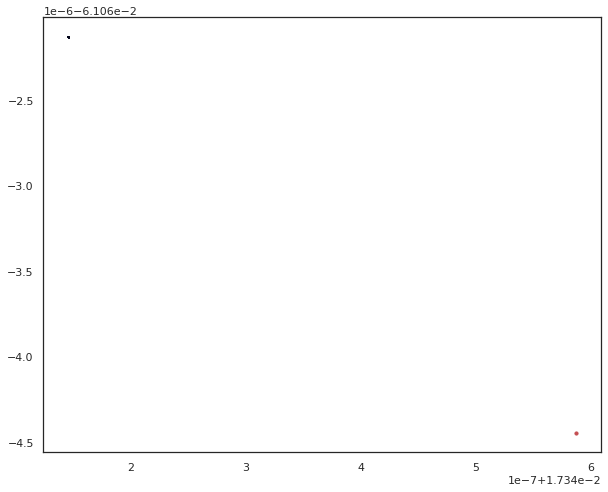

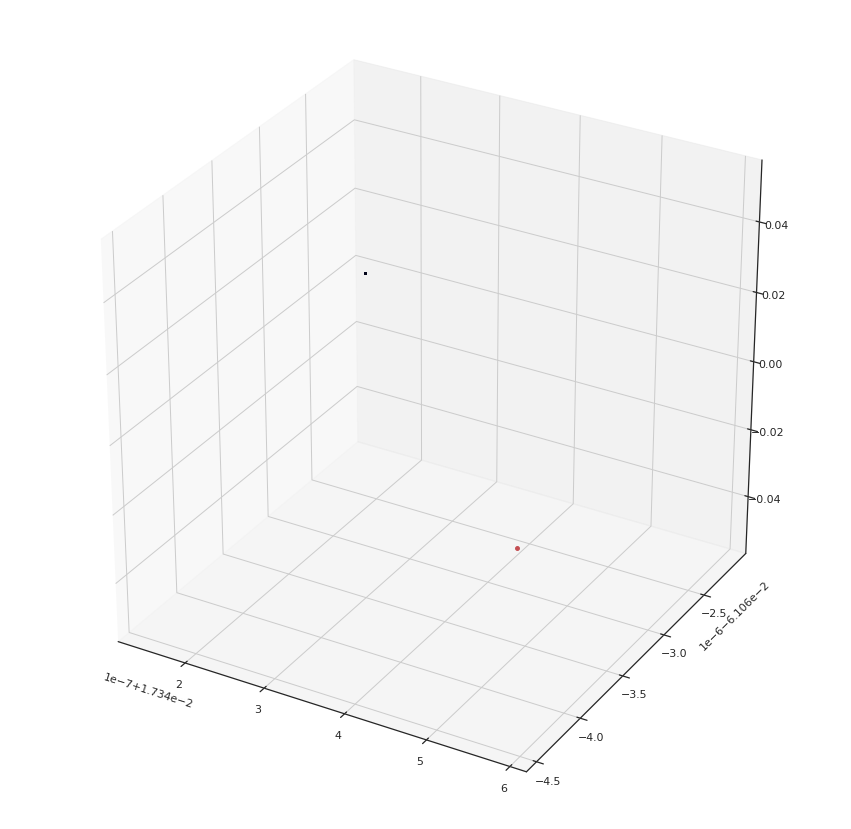

In [ ]:
elonizer2000.Fit(my_tweets2)

In [ ]:
elonizer2000.Predict(my_tweets2)

array([1, 1, 1, ..., 1, 1, 1])